#### The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

Airline- Name of the airline company

Flight- Plane's flight code

Source City- City from which the flight takes off

Departure Time- Time of Departure

Stops- Number of stops between the source and destination cities

Arrival Time- Time of Arrival

Destination City- City where the flight will land

Class- Contains information on seat class

Duration- Overall amount of time taken to travel between cities in hours.

Days left- Subtracting the trip date by the bookingdate.

Price- Ticket price

In [105]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [29]:
#Loading the data and removing unnecessary column from the dataframe

df=pd.read_csv(r"C:\Users\saura\Documents\INTELLIPAT\Projects\Flight_Booking\Flight_Booking.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [30]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
#Checking the shape of a dataframe and datatypes.

print(df.shape,'\n') #3L+ data
print('\n',df.info()) #many columns in object, need to convert in int for analysis

(300153, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB

 None


In [32]:
#statistical data
df.describe().T


,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [46]:
#Checking out the missing values in a dataframe

df.isnull().sum().sum() 

#NO null values

0

<AxesSubplot: xlabel='class', ylabel='price'>

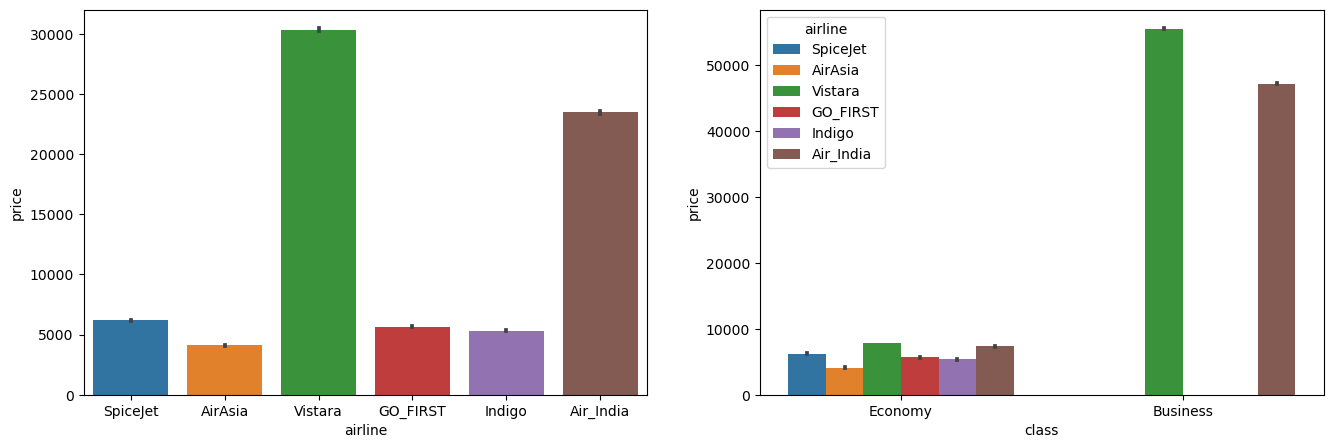

In [45]:
# Price range of all the flights

fig,ax=plt.subplots(nrows=1,ncols=2 ,figsize=(16,5))
sns.barplot(df,x=df['airline'],y=df['price'], ax=ax[0])
sns.barplot(df,x=df['class'],y=df['price'],hue=df['airline'], ax=ax[1])

#Vistara and Air india are generally expensive as compared to their counterparts irrespective of class.

<AxesSubplot: xlabel='arrival_time', ylabel='price'>

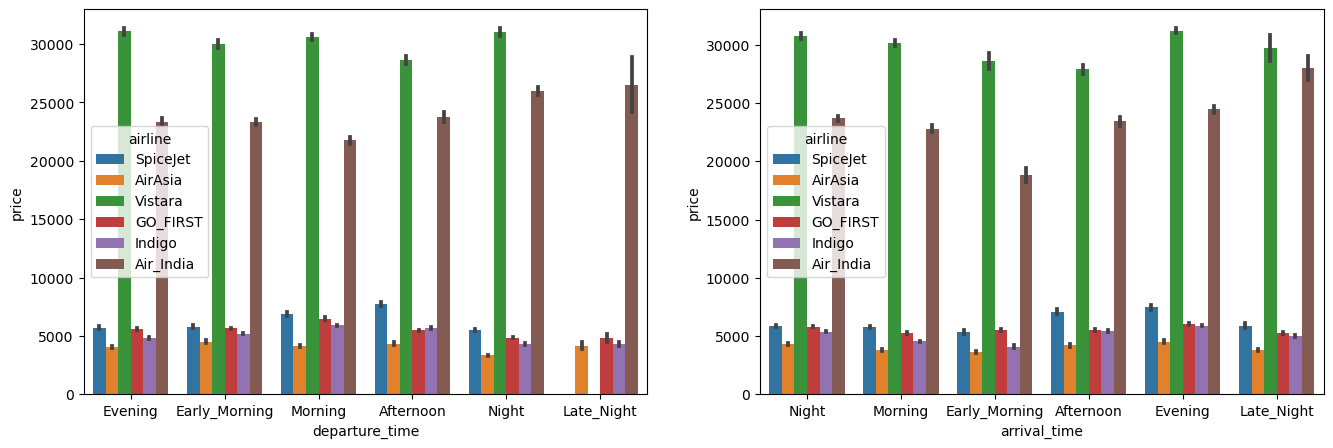

In [53]:
fig,ax=plt.subplots(nrows=1,ncols=2 ,figsize=(16,5))
sns.barplot(df,x=df['departure_time'],y=df['price'],hue=df['airline'], ax=ax[0])
sns.barplot(df,x=df['arrival_time'],y=df['price'],hue=df['airline'], ax=ax[1])

#We can safely say that Vistara and Air india are on higher range irrespective of time.

<AxesSubplot: xlabel='days_left', ylabel='price'>

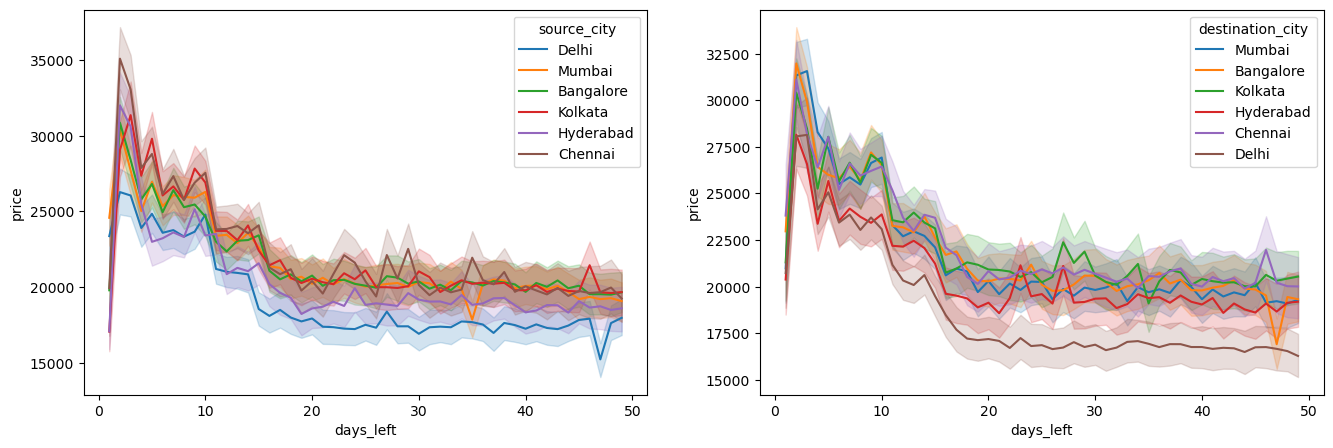

In [52]:
#Comparison wrt Source and destination cities

fig,ax=plt.subplots(nrows=1,ncols=2 ,figsize=(16,5))
sns.lineplot(df, x=df['days_left'], y=df['price'], hue=df['source_city'], ax=ax[0])
sns.lineplot(df, x=df['days_left'], y=df['price'], hue=df['destination_city'], ax=ax[1])

#Irrespective of source or destination city, price increases significantly as days left for travel falls below 20
# For Delhi and Hyderabad prices observed are less compared to other cities.
# Chennai and Kolkata flights are expensive as compared to others.
# Mumbai, Banglore lie in middle range.

<AxesSubplot: xlabel='class', ylabel='count'>

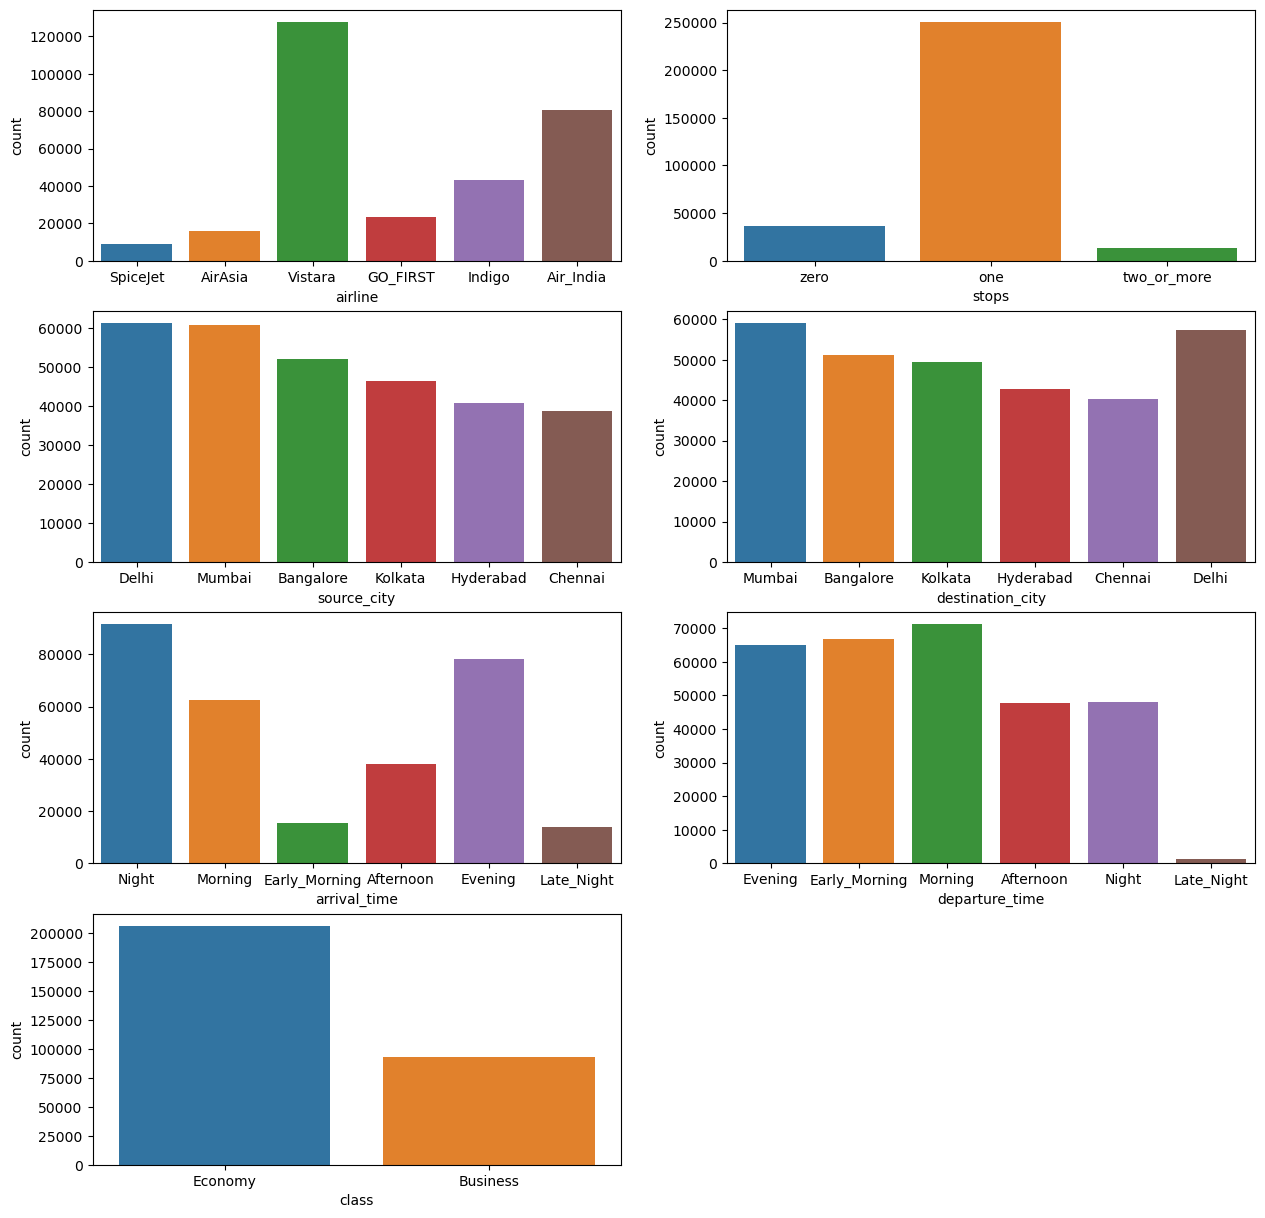

In [67]:
#Visualization of categorical features with countplot

plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.countplot(df, x=df['airline'])

plt.subplot(4,2,2)
sns.countplot(df, x=df['stops'])

plt.subplot(4,2,3)
sns.countplot(df, x=df['source_city'])

plt.subplot(4,2,4)
sns.countplot(df, x=df['destination_city'])

plt.subplot(4,2,5)
sns.countplot(df, x=df['arrival_time'])

plt.subplot(4,2,6)
sns.countplot(df, x=df['departure_time'])

plt.subplot(4,2,7)
sns.countplot(df, x=df['class'])


#Vistara and Airindia have highest frequency.
#Majority of flights are one stop.
#Mumbai, Delhi are top source and destination.
#Flyers prefer flying early in the morning and reaching after evening
#Economy class passengers are more than the double of business class.

In [74]:
#Performing One Hot Encoding for categorical features
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [76]:
col_list=list(df.columns)

for col in col_list:
    if df[col].dtypes=='object':
        df[col]=encode.fit_transform(df[col])
    else:
        continue

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   airline           300153 non-null  int32
 1   flight            300153 non-null  int32
 2   source_city       300153 non-null  int32
 3   departure_time    300153 non-null  int32
 4   stops             300153 non-null  int32
 5   arrival_time      300153 non-null  int32
 6   destination_city  300153 non-null  int32
 7   class             300153 non-null  int32
 8   duration          300153 non-null  int64
 9   days_left         300153 non-null  int64
 10  price             300153 non-null  int64
dtypes: int32(8), int64(3)
memory usage: 16.0 MB


<AxesSubplot: >

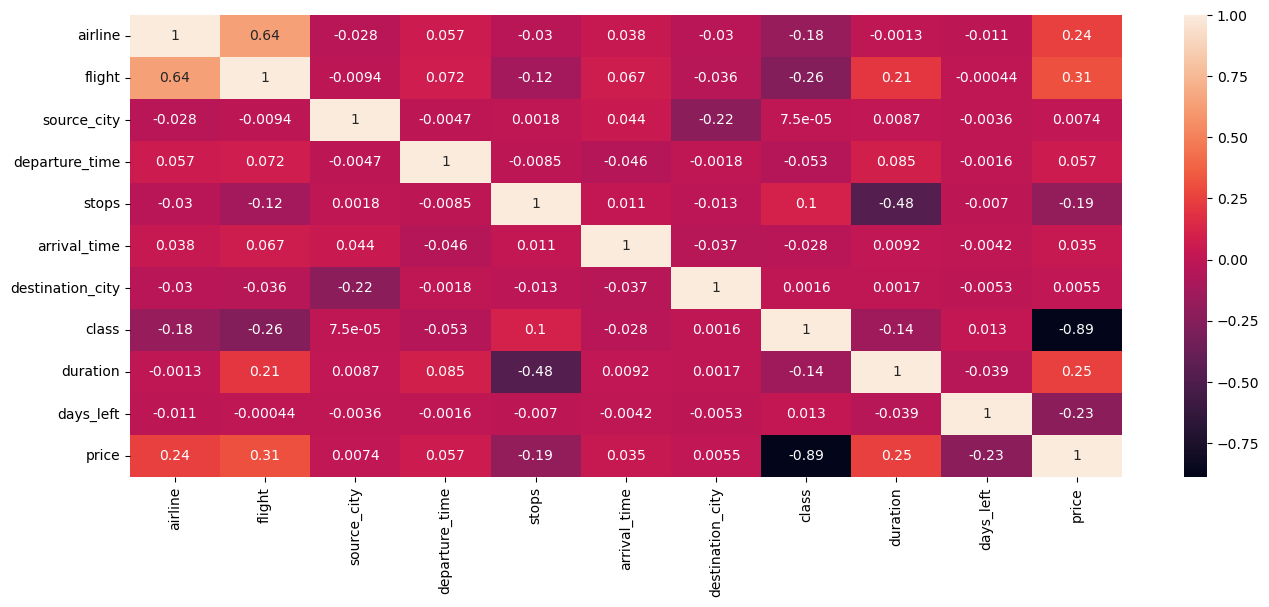

In [89]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

#Departure time, arrival time are least related to other features.

In [93]:
#Selecting the features using VIF. VIF should be less than 5.

from statsmodels.stats.outliers_influence import variance_inflation_factor

x=df.iloc[:,:-1] #except price all 
y=df.iloc[:,-1] #only price column

In [94]:
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))] 
print(vif_data)

            feature        VIF
0           airline   6.707005
1            flight  12.602255
2       source_city   2.959897
3    departure_time   2.800185
4             stops   1.447444
5      arrival_time   3.775625
6  destination_city   2.907191
7             class   2.840026
8          duration   4.392176
9         days_left   3.862057


In [95]:
x=x.drop(['flight'],axis=1) #VIF(flight) > 5

In [96]:
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))] 
print(vif_data)

            feature       VIF
0           airline  3.376737
1       source_city  2.914358
2    departure_time  2.771473
3             stops  1.436293
4      arrival_time  3.669504
5  destination_city  2.870019
6             class  2.838291
7          duration  3.812975
8         days_left  3.772279


In [ ]:
#all under 5, good to go

In [97]:
#train-test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.8,random_state=42)

In [98]:
#Standardisation

from sklearn.preprocessing import StandardScaler
stand=StandardScaler()

x_train=stand.fit_transform(x_train)
x_test=stand.transform(x_test)

In [112]:
#Linear regression

from sklearn.linear_model import LinearRegression 
LR=LinearRegression()

LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [106]:
#Accuracy

from sklearn.metrics import *
print('R2 score : ',r2_score(y_pred,y_test))
print('Mean absolute error : ', mean_absolute_error(y_pred,y_test))
print('Root MSE : ', np.sqrt(mean_squared_error(y_pred,y_test)))

R2 score :  0.8421993665055411
Mean absolute error :  1178.571926769909
Root MSE :  1515.5469596187754


C:\Users\saura\AppData\Local\Temp\ipykernel_16000\1459617932.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predictions')
C:\Users\saura\AppData\Local\Temp\ipykernel_16000\1459617932.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual')


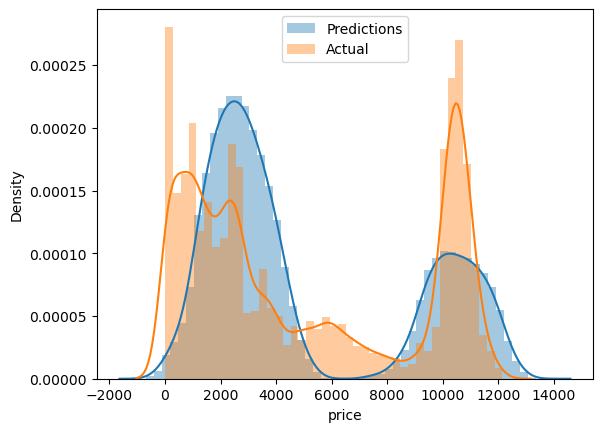

In [110]:
#Predictions

sns.distplot(y_pred, label='Predictions')
sns.distplot(y_test, label='Actual')
plt.legend()

In [118]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()

DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)

In [119]:
#Accuracy

print('R2 score : ',r2_score(y_pred,y_test))
print('Mean absolute error : ', mean_absolute_error(y_pred,y_test))
print('Root MSE : ', np.sqrt(mean_squared_error(y_pred,y_test)))

R2 score :  0.9457816552777003
Mean absolute error :  410.95910082193996
Root MSE :  956.376239942197


C:\Users\saura\AppData\Local\Temp\ipykernel_16000\1154989041.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predictions')
C:\Users\saura\AppData\Local\Temp\ipykernel_16000\1154989041.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual')


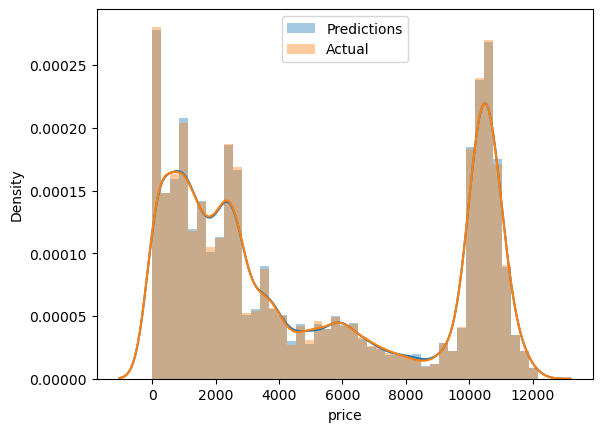

In [120]:
#Predictions

sns.distplot(y_pred, label='Predictions')
sns.distplot(y_test, label='Actual')
plt.legend()

In [121]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=100)

RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

In [122]:
#Accuracy

print('R2 score : ',r2_score(y_pred,y_test))
print('Mean absolute error : ', mean_absolute_error(y_pred,y_test))
print('Root MSE : ', np.sqrt(mean_squared_error(y_pred,y_test)))

R2 score :  0.9680809877497174
Mean absolute error :  371.9263641425572
Root MSE :  721.1954746329997


C:\Users\saura\AppData\Local\Temp\ipykernel_16000\1154989041.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predictions')
C:\Users\saura\AppData\Local\Temp\ipykernel_16000\1154989041.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual')


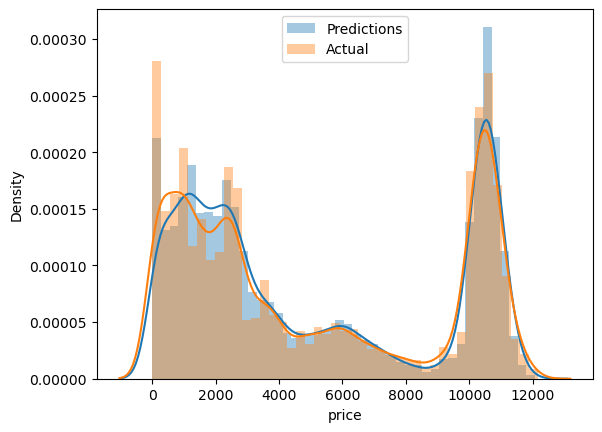

In [123]:
#Predictions

sns.distplot(y_pred, label='Predictions')
sns.distplot(y_test, label='Actual')
plt.legend()

Conclusion: Random Forest gives best accuracy and predictions.